# Viewing classes in the dataset

In [ ]:

import os
dir= '/content/drive/MyDrive/DATA/TRAIN'
classes= os.listdir(dir)
print (classes)

['PEANUTS', 'TREE NUTS', 'MILK', 'NO ALLERGENS', 'FISH', 'EGG', 'SOY', 'WHEAT']


#Visualizing the data

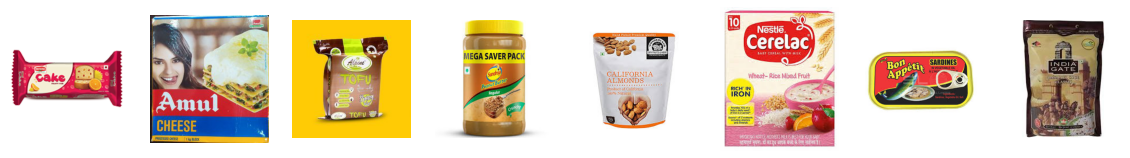

In [ ]:
dir_with_examples = '/content/drive/My Drive/VISUALIZE'
files_per_row = 8
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

import matplotlib.pyplot as plt
from PIL import Image
import math

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

# Importing required libraries


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dense, Dropout
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

# Data preparation and loading 

In [ ]:
train= '/content/drive/MyDrive/DATA/TRAIN'
train_generator= ImageDataGenerator(rescale=1./255, 
                                    horizontal_flip= True,
                                    vertical_flip= True,
                                    rotation_range= 45,
                                    validation_split=0.2)

train_datagen= train_generator.flow_from_directory(train,
                                                   batch_size= 16,
                                                   target_size=(128,128),
                                                   class_mode= 'sparse',
                                                   subset='training')

val_datagen= train_generator.flow_from_directory(train,
                                                   batch_size= 16,
                                                   target_size=(128,128),
                                                   class_mode= 'sparse',
                                                   subset='validation')




Found 488 images belonging to 8 classes.
Found 119 images belonging to 8 classes.


In [ ]:
train_labels= (train_datagen.class_indices)
print (train_labels)

{'EGG': 0, 'FISH': 1, 'MILK': 2, 'NO ALLERGENS': 3, 'PEANUTS': 4, 'SOY': 5, 'TREE NUTS': 6, 'WHEAT': 7}


In [ ]:
test= '/content/drive/MyDrive/DATA/TEST'
test_generator= ImageDataGenerator(rescale=1./255) 
                                    

test_datagen= test_generator.flow_from_directory(test,
                                                   batch_size= 16,
                                                   target_size=(128,128),
                                                   class_mode= 'sparse')
                                                   

Found 163 images belonging to 8 classes.


In [ ]:
test_labels= (test_datagen.class_indices)
print (test_labels)

{'EGG': 0, 'FISH': 1, 'MILK': 2, 'NO ALLERGENS': 3, 'PEANUTS': 4, 'SOY': 5, 'TREE NUTS': 6, 'WHEAT': 7}


# Model architecture

In [ ]:
model= Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(128,128,3), activation= 'ReLU'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, kernel_size=(3,3), padding='same', input_shape=(128,128,3), activation= 'ReLU'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(128,128,3), activation= 'ReLU'))
model.add(MaxPooling2D(pool_size=2)) 

model.add(Flatten())
model.add(Dense(64, activation='ReLU'))
model.add(Dense(32, activation='ReLU'))
model.add(Dense(8, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)             

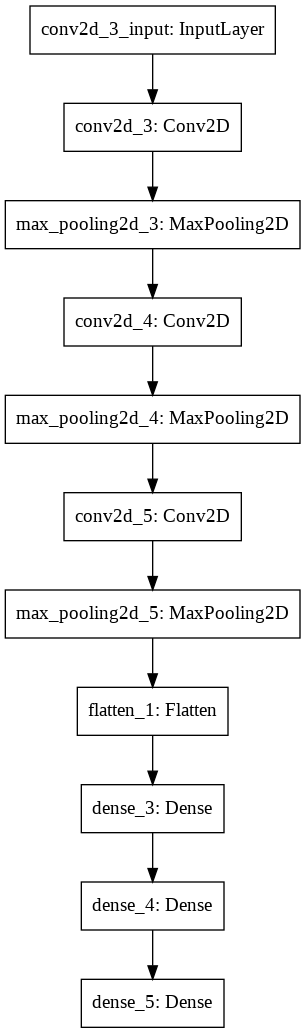

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

# Training the model

In [ ]:
train_model= model.fit(train_datagen, epochs= 50, batch_size=16, validation_data=val_datagen, verbose= 1)

Epoch 1/50
31/31 [==============================] - 5s 136ms/step - loss: 2.0662 - accuracy: 0.2029 - val_loss: 2.0445 - val_accuracy: 0.2269
Epoch 2/50
31/31 [==============================] - 4s 122ms/step - loss: 2.0295 - accuracy: 0.2275 - val_loss: 2.0172 - val_accuracy: 0.2269
Epoch 3/50
31/31 [==============================] - 4s 123ms/step - loss: 2.0162 - accuracy: 0.2213 - val_loss: 2.0013 - val_accuracy: 0.2269
Epoch 4/50
31/31 [==============================] - 4s 121ms/step - loss: 2.0036 - accuracy: 0.2234 - val_loss: 1.9876 - val_accuracy: 0.2437
Epoch 5/50
31/31 [==============================] - 4s 121ms/step - loss: 1.9868 - accuracy: 0.2398 - val_loss: 1.9994 - val_accuracy: 0.2353
Epoch 6/50
31/31 [==============================] - 4s 122ms/step - loss: 1.9539 - accuracy: 0.2336 - val_loss: 1.9893 - val_accuracy: 0.2689
Epoch 7/50
31/31 [==============================] - 4s 119ms/step - loss: 1.9252 - accuracy: 0.2951 - val_loss: 2.0664 - val_accuracy: 0.2521
Epoch 

In [ ]:
model.save('model.h5')

accuracy= 98.47670197486877
output= EGG


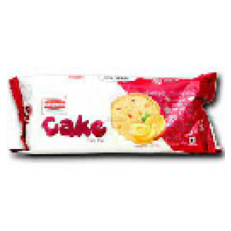

In [ ]:
from tensorflow.keras.preprocessing import image 
import numpy as np
test_img= test+'/EGG/download (1).jpg'
#print (test_img)
img= image.load_img(test_img, target_size=(128,128))
img_array= image.img_to_array(img)
img_array= np.array(img_array)/255.0

labels= dict((value,key) for key, value in train_labels.items())
predictions= model.predict(img_array[np.newaxis,...])

acc=np.max(predictions[0])*100
print ("accuracy=", acc)

result= labels[np.argmax(predictions[0], axis=-1)]
print ("output=", result)

plt.axis('off')
plt.imshow(img)